# 타이타닉 데이터 

## head, tail, str

In [1]:
train_df <- read.csv("../RFile/Titanic_train.csv")
head(train_df)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [2]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,,Q
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NA,1,2,W./C. 6607,23.450,,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,,Q


In [3]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 191 354 273 16 555 516 625 413 577 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


## 컬럼 내용 확인 
- Survived : 생존여부 (0 = 사망, 1 = 생존, 딴 것도 있나 확인) ---> Target Column    
- Pclass : 티켓등급 (1 = 1등급, 2 = 2등급, 3= 3등급)      
- SibSp : 함께 탑승한 형제, 자매, 배우자 수    
- Parch : 함께 탑승한 부모, 자식 수    
- Fare : 운임 (짐 비용)   
- Cabin : 객실 번호    
- Embarked : 탑승항구 (C = Chersbourg, Q = Queenstown, S = Southampton)

## 컬럼별 검토

### NA

In [4]:
# 각 컬럼별 NA 확인 
sum(is.na(train_df)) # - 총 177개 있음 
colSums(is.na(train_df)) # - 컬럼별 합계 (for문 해도 되는데 함수 있으니까 간편)

[1] 177

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [5]:
# - 나이는 생사여부와 관련이 있을거 같고, 20%기 때문에 버릴 수 없는 데이터 
# - 하지만 age에 넣을 데이터를 정할 근거가 없음 
# ---> 177개 빼고 나머지 걸로 해보자.. (20%니까..)  
177 / 891 

# train_df$Age가 NA인 것 빼고 DataSet 만들기 (생각난 김에 코드 만들어 놓고 넘어감,,)

head(subset(train_df, !is.na(Age)))
nrow(subset(train_df, !is.na(Age)))

[1] 0.1986532

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S


[1] 714

### Target Column : Survived

In [6]:
# Survived 기준으로 DataSet 정렬 (사망, 생존 섞여 있으면 제대로 학습 할 수 없으니까)
# - rownames는 알아서 해줌 
library(dplyr)
train_df <- arrange(train_df, Survived)
print(head(train_df))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



  PassengerId Survived Pclass                           Name  Sex Age SibSp
1           1        0      3        Braund, Mr. Owen Harris male  22     1
2           5        0      3       Allen, Mr. William Henry male  35     0
3           6        0      3               Moran, Mr. James male  NA     0
4           7        0      1        McCarthy, Mr. Timothy J male  54     0
5           8        0      3 Palsson, Master. Gosta Leonard male   2     3
6          13        0      3 Saundercock, Mr. William Henry male  20     0
  Parch    Ticket    Fare Cabin Embarked
1     0 A/5 21171  7.2500              S
2     0    373450  8.0500              S
3     0    330877  8.4583              Q
4     0     17463 51.8625   E46        S
5     1    349909 21.0750              S
6     0 A/5. 2151  8.0500              S


In [7]:
tail(train_df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28,1,0,P/PP 3381,24.0000,,C
887,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15,0,0,2667,7.2250,,C
888,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56,0,1,11767,83.1583,C50,C
889,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25,0,1,230433,26.0000,,S
890,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S
891,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C


In [8]:
# 정렬된 크기 확인하기 
dim(train_df) # - row / column 수 

[1] 891  12

In [9]:
# Target Column : Survived 분석 및 확인 
# -- Target Column 은 비율이 일정해야 함 (그래야 공평하니까)
# -- Featrue Column은 균등하지 않아야 함 (그래야 특징이 될 수 있으니까)

In [10]:
table(train_df$Survived)


  0   1 
549 342 

In [11]:
# Survived 생존, 사망 Count 및 비율 확인 

# 사망자 수 
deathCount <- sum(train_df$Survived == 0)
# --> subset 해서 nrow 해도 되고 / table에서 인덱스 해도 되고 
# 생존자 수 
liveCount <- sum(train_df$Survived == 1)
# 생존자 수의 비율 
#sum(train_df$Survived == 0) / length(train_df$Survived) * 100
sum(train_df$Survived == 1) / length(train_df$Survived) * 100

# ----> 38% 좀 그렇긴 한데 그래도 그냥 저냥 넘어감 
# -----> (그래서 예측력이 떨어질 수도 있다.. 그런데 데이터 더 요구할 수 없는 상황이니까 어쩔 수 없다..)
# -----> 이걸로 해보고 결과를 본 다음에, 또 어떻게 변형을 해서 비율을 5:5 로 맞춰보고 이런식으로.. 
# ------> 처음부터 막 바꾸는 것 아님 (모든 결정에 근거, 이유가 있도록!)

[1] 38.38384

In [12]:
# 사망, 생존 비율 파이차트 그리기 (타겟 컬럼의)

survivedVector <- c(deathCount,liveCount)
ratio <- round(survivedVector / sum(survivedVector) * 100, 2)
ratio

[1] 61.62 38.38

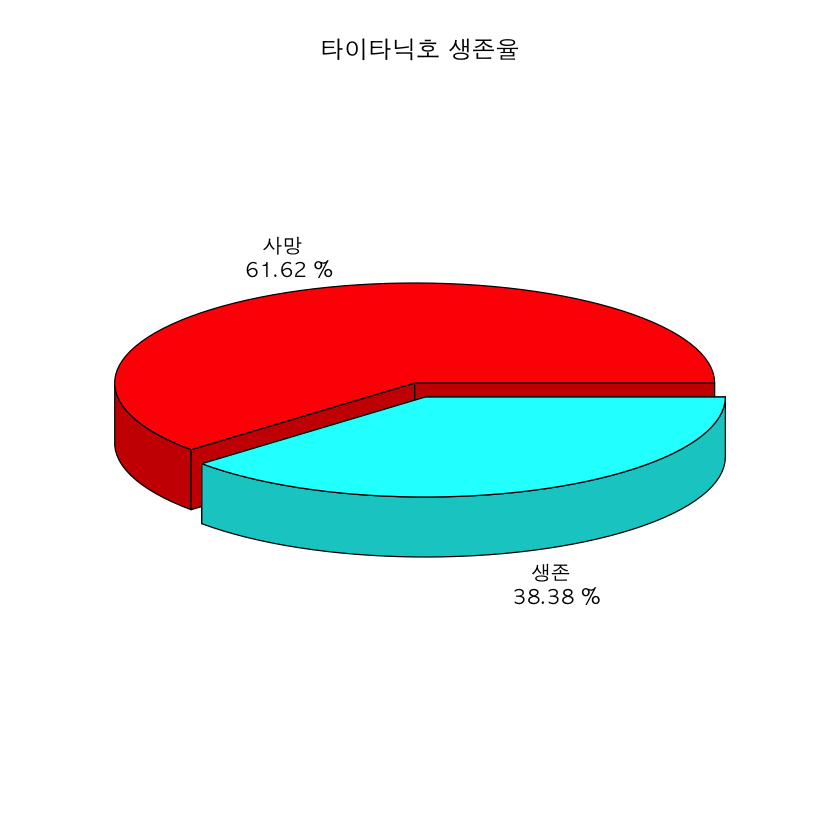

In [13]:
library(plotrix)
options(warn = -1)
par(family = "AppleGothic")
pie3D(ratio,
    main = "타이타닉호 생존율",
    labels = paste(c("사망","생존"), "\n", ratio, "%"),
    explode = 0.05,
    labelcex = 1
   )

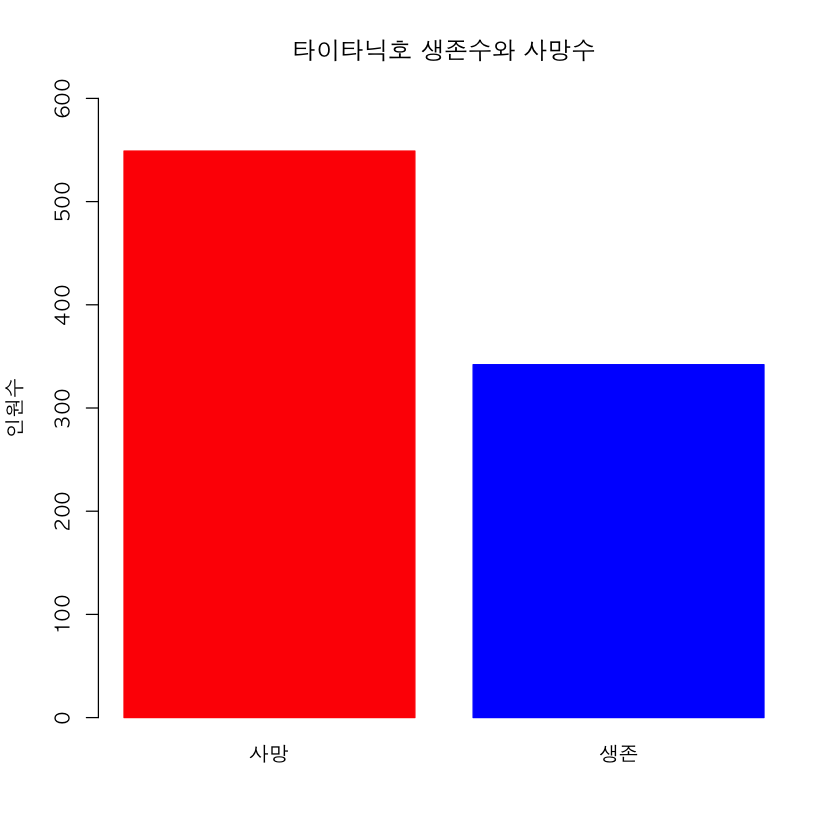

In [14]:
# 사망자 수, 생존자 수 막대그래프 그리기 
par(family = "AppleGothic")
barplot(survivedVector,
        main = "타이타닉호 생존수와 사망수",
        ylim = c(0, 600),
        names = c("사망", "생존"),
        col = c('red','blue'),
        ylab = "인원수",
        border = c("red", "blue")
       )

# --참고) survivedVector 안 구한 상황이었으면 table 쓰면 table 모양 대로 그래프 그려줌! 간편!

> Target Column 으로 Survived를 선정! 

### Feature Column 

In [15]:
# Feature Column 찾기 

head(train_df) 

# --> 채택 : 타겟 - Survived, 피처 - Sex, Pclass....
# --> 삭제 : PassengerId, Name, Ticket, ...

# 이렇게 생각하면서 일단 쉬운거(구분 적은거)부터 관계 있나 살펴보기 
# 범주형이 더 쉬움 (객관식), 그리고 결측치 없는거,,, 등등 

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


#### Sex 컬럼 확인 


In [16]:
# Sex 컬럼 분류 확인 
unique(train_df$Sex)

[1] male   female
Levels: female male

In [17]:
# 여성과 남성의 인원수 확인 
table(train_df$Sex)
femaleCount <- sum(train_df$Sex == 'female') 
maleCount <- sum(train_df$Sex == 'male') 
femaleCount
maleCount


female   male 
   314    577 

[1] 314

[1] 577

In [18]:
# 여성의 생존수, 사망수 
femaleSurvive <- sum(train_df$Sex == 'female' & train_df$Survived == 1)
femaleDeath <- sum(train_df$Sex == 'female' & train_df$Survived == 0)

In [19]:
# 남성의 생존수, 사망수 
maleSurvive <- sum(train_df$Sex == 'male' & train_df$Survived == 1)
maleDeath <- sum(train_df$Sex == 'male' & train_df$Survived == 0)

In [20]:
# 여성의 생존율, 사망율 
cat("여성의 생존율: ", round(femaleSurvive / femaleCount *100, 2), "%\n")
cat("여성의 사망율: ", round(femaleDeath/ femaleCount *100, 2), "%")

여성의 생존율:  74.2 %
여성의 사망율:  25.8 %

In [21]:
# 남성의 생존율, 사망율 
cat("남성의 생존율: ", round(maleSurvive / maleCount *100, 2), "%\n")
cat("남성의 사망율: ", round(maleDeath / maleCount *100, 2), "%")

남성의 생존율:  18.89 %
남성의 사망율:  81.11 %

> 성별 - 생사여부 같이 볼 때, Sex 컬럼은 피처로 적합!  <br>
> [Survived] <- [Sex]

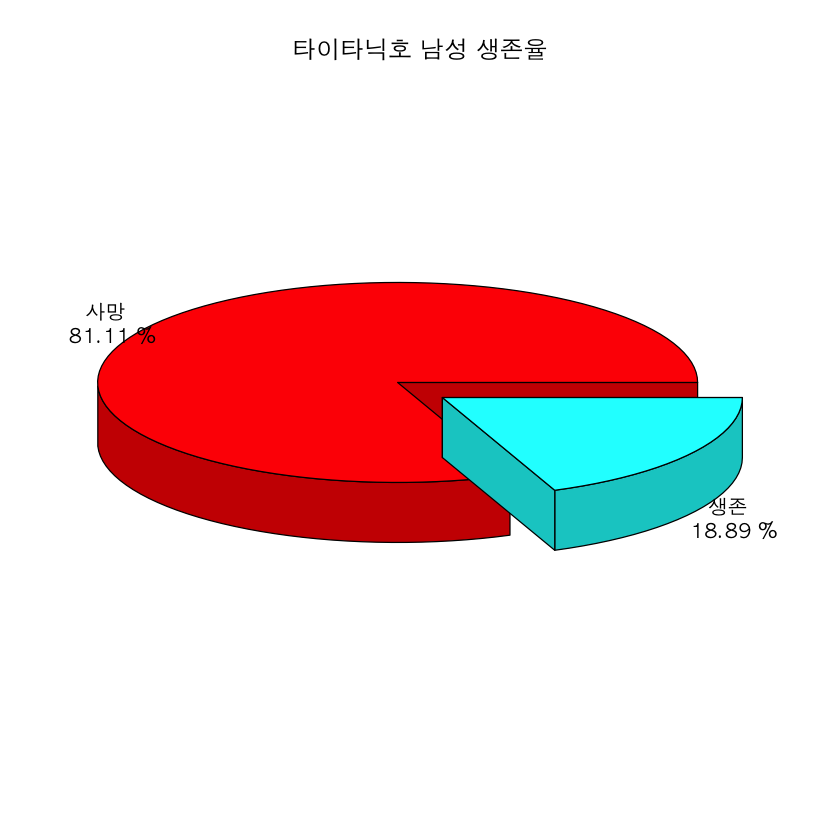

In [22]:
# 타이타닉호 남성 생존율 파이 차트 그리기 

ratio.male <- c(round(maleDeath / maleCount *100, 2), round(maleSurvive / maleCount *100, 2))

library(plotrix)
options(warn = -1)
par(family = "AppleGothic")
pie3D(ratio.male,
    main = "타이타닉호 남성 생존율",
    labels = paste(c("사망","생존"), "\n", ratio.male, "%"),
    labelcex = 1,
    explode = 0.09
   )

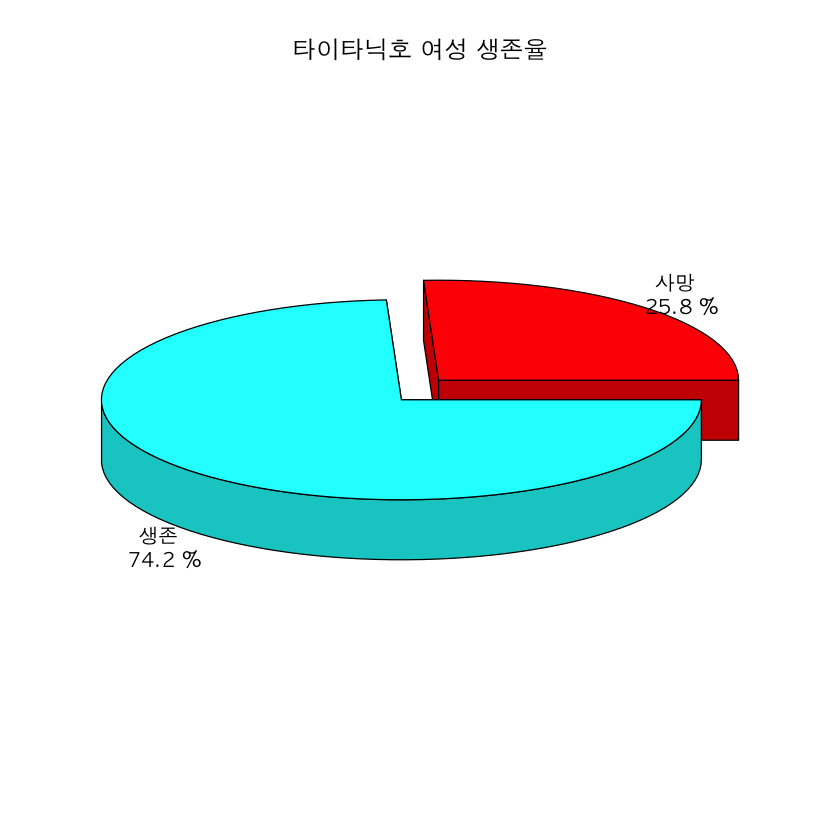

In [23]:
# 타이타닉호 여성 생존율 파이 차트 그리기 

ratio.female <- c(round(femaleDeath / femaleCount *100, 2), round(femaleSurvive / femaleCount *100, 2))

library(plotrix)
options(warn = -1)
par(family = "AppleGothic")
pie3D(ratio.female,
    main = "타이타닉호 여성 생존율",
    labels = paste(c("사망","생존"), "\n", ratio.female, "%"),
    labelcex = 1,
    explode = 0.09
   )

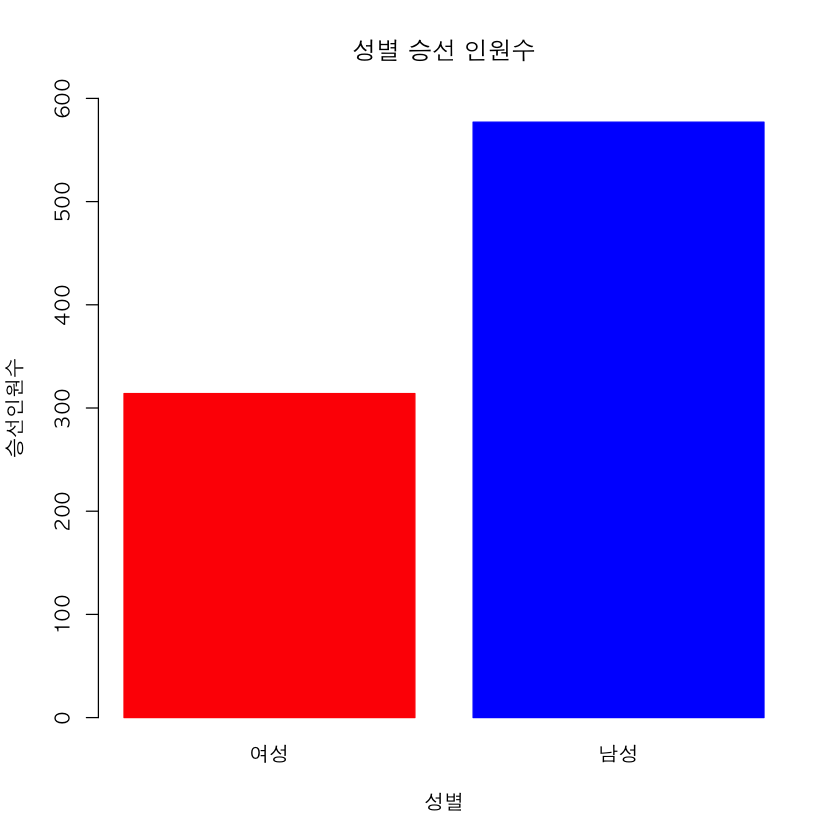

In [24]:
# 성별 승선 인원수 막대그래프 그리기 


par(family = "AppleGothic")
barplot(table(train_df$Sex),
        main = "성별 승선 인원수",
        ylim = c(0, 600),
        names = c("여성", "남성"),
        col = c('red','blue'),
        ylab = "승선인원수",
        xlab = "성별",
        border = c("red", "blue")
       )

In [25]:
class(table(train_df$Sex)[1])

[1] "integer"

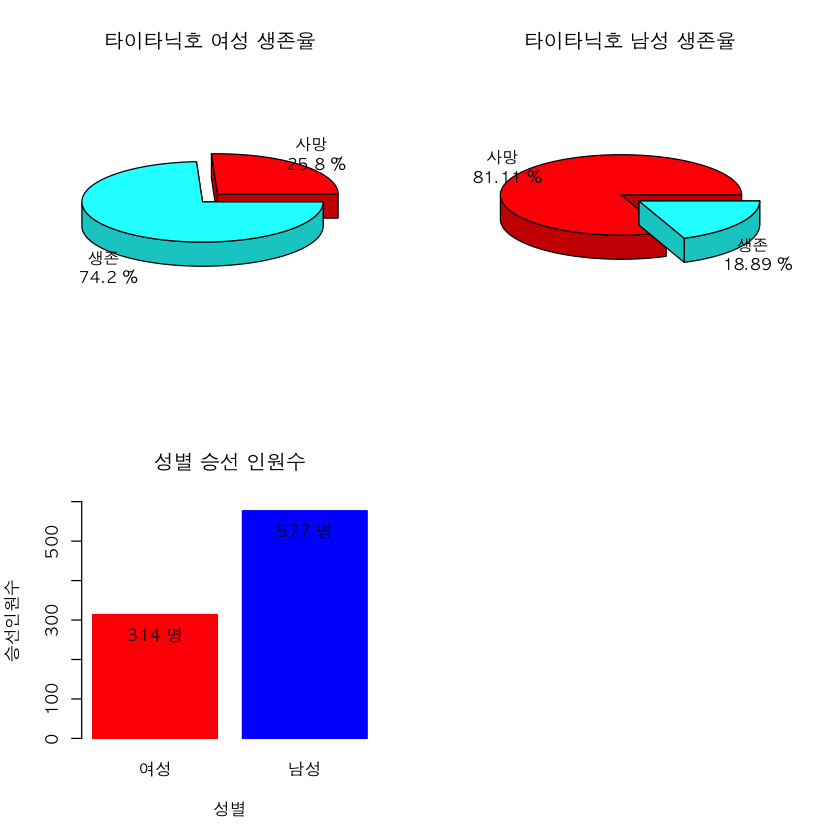

In [26]:
# 한 화면에 3개 그리기 

par(mfrow = c(2,2))
par(family = "AppleGothic")
# 타이타닉호 남성 생존율 파이 차트 그리기 


pie3D(ratio.female,
    main = "타이타닉호 여성 생존율",
    labels = paste(c("사망","생존"), "\n", ratio.female, "%"),
    labelcex = 0.8,
    explode = 0.09
   )
pie3D(ratio.male,
    main = "타이타닉호 남성 생존율",
    labels = paste(c("사망","생존"), "\n", ratio.male, "%"),
    labelcex = 0.8,
    explode = 0.09
   )



barplot(table(train_df$Sex),
        main = "성별 승선 인원수",
        ylim = c(0, 600),
        names = c("여성", "남성"),
        col = c('red','blue'),
        ylab = "승선인원수",
        xlab = "성별",
        border = c("red", "blue")
       )

text(0.7, table(train_df$Sex)[1]-50, paste(table(train_df$Sex)[1], "명"))
text(1.9, table(train_df$Sex)[2]-50, paste(table(train_df$Sex)[2], "명")) 

---
#### Pclass(티켓등급) 컬럼 확인

In [27]:
table(train_df$Pclass)


  1   2   3 
216 184 491 

In [28]:
# 1등 객실의 여성 생존율 
nrow(subset(train_df, (Pclass == 1) & (Sex == 'female')))
nrow(subset(train_df, (Pclass == 1) & (Survived == 1) & (Sex == 'female')))

cat(
"1등 객실의 여성 생존율은",
nrow(subset(train_df, (Pclass == 1) & (Survived == 1) & (Sex == 'female'))), "/", 
nrow(subset(train_df, (Pclass == 1) & (Sex == 'female'))),",",
round(nrow(subset(train_df, (Pclass == 1) & (Survived == 1) & (Sex == 'female'))) / nrow(subset(train_df, (Pclass == 1) & (Sex == 'female'))) * 100, 2), "%"
)


[1] 94

[1] 91

1등 객실의 여성 생존율은 91 / 94 , 96.81 %

In [29]:
# 1, 2, 3등 객실의 여성 생존율 (반복문 사용)


for(k in c('female','male')) {
    
    
    for(i in 1:3) {
    
        cat(
            i, "등 객실의", ifelse(k == 'female', '여성','남성'), "생존율은",
            nrow(subset(train_df, (Pclass == i) & (Survived == 1) & (Sex == k))), "/", 
            nrow(subset(train_df, (Pclass == i) & (Sex == k))),",",
            round(nrow(subset(train_df, (Pclass == i) & (Survived == 1) & (Sex == k))) / 
                  nrow(subset(train_df, (Pclass == i) & (Sex == k))) * 100, 2), "%\n"
            )

    }
    cat("------------------------------------------\n")
    
}





1 등 객실의 여성 생존율은 91 / 94 , 96.81 %
2 등 객실의 여성 생존율은 70 / 76 , 92.11 %
3 등 객실의 여성 생존율은 72 / 144 , 50 %
------------------------------------------
1 등 객실의 남성 생존율은 45 / 122 , 36.89 %
2 등 객실의 남성 생존율은 17 / 108 , 15.74 %
3 등 객실의 남성 생존율은 47 / 347 , 13.54 %
------------------------------------------


In [30]:
# 객실 등급별 생존율 막대 그래프로 표현하기 

# - 그래프 그릴 데이터 벡터로 준비 

ratio.class <- NULL
bar.names <- NULL

for(k in c('female','male')) {
    
    
    for(i in 1:3) {
            bar.names <- append(bar.names,
                                paste(i,"객실(",ifelse(k == 'female', '여','남'),")", 
                                sep = "")
                               )
            ratio.class <- append(ratio.class, 
                                  round(nrow(subset(train_df, (Pclass == i) & (Survived == 1) & (Sex == k))) 
                                        / nrow(subset(train_df, (Pclass == i) & (Sex == k))) * 100, 2
                                       )
                                 )
    }
    
}

ratio.class
bar.names

[1] 96.81 92.11 50.00 36.89 15.74 13.54

[1] "1객실(여)" "2객실(여)" "3객실(여)" "1객실(남)" "2객실(남)" "3객실(남)"

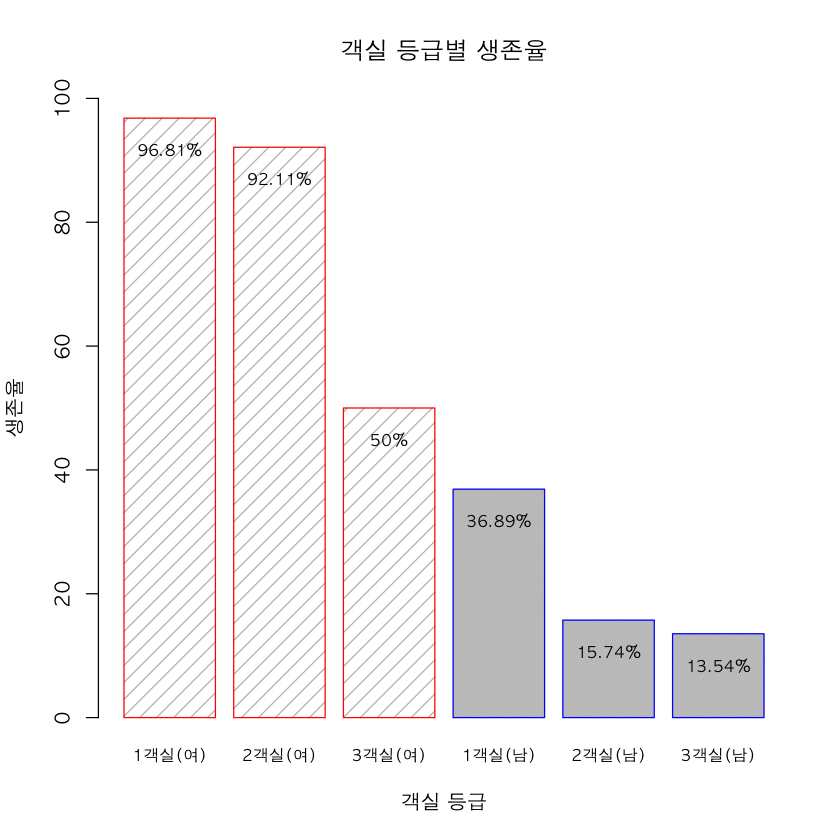

In [31]:
# - 그래프 그리기 
par(family = "AppleGothic")
barplot(ratio.class,
        main = "객실 등급별 생존율", 
        ylim = c(0,100),
        ylab = "생존율", 
        xlab = "객실 등급", 
        names = bar.names,
        cex.names = 0.8,
        border = c(rep("red", 3), rep('blue', 3)),
        density = c(rep(10, 3), rep(100,3))
       )

for(i in 1:6) {
    text(0.7 + (1.2*(i-1)), ratio.class[i]-5, paste(ratio.class[i],"%", sep=""), cex = 0.8)
}

> 객실등급 - 생사여부 같이 볼 때, Pclass 컬럼은 피처로 적합!  <br>
> [Survived] <- [Pclass] <br>
> feature는 3개 이상은 되어야 머신러닝 돌려볼 수 있음 

--- 
#### Embarked(항구의 위치) 컬럼 확인

In [32]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 555 516 625 730 29 841 683 840 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


In [33]:
# Embarked 컬럼 요소별 갯수 보기 
table(train_df$Embarked)

# --> "" 비어있는 데이터가 2개 있음 


      C   Q   S 
  2 168  77 644 

In [34]:
# 빈칸 데이터 어딨는지 찾기 
subset(train_df, Embarked == "")

# --> PassengerId 62, 830번 항구 위치 없음 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


In [35]:
# 위에 두명 어떻게 처리 ? 
# - 항구별 탑승인원을 구하여 가장 많은 탑승인원의 항구로 결정 (확률상 가장 높을테니까)

# -- S항구 탑승인원 
sum(train_df$Embarked == "S")
# -- C항구 탑승인원 
sum(train_df$Embarked == "C")
# -- Q항구 탑승인원 
sum(train_df$Embarked == "Q")

# ---> S항구로 지정해도 무방하다.. 

[1] 644

[1] 168

[1] 77

In [36]:
# 연습을 위한 테이터셋 복제 

train_df_T <- train_df

# 빈칸 항구 찾기 - 1 
subset(train_df_T, Embarked == "")

# 빈칸 항구 찾기 - 2
train_df_T[train_df_T$Embarked == "",]

# 빈 값에 S 넣기 - 1
train_df_T$Embarked <- ifelse(train_df_T$Embarked == "", "S", train_df_T$Embarked)


train_df_T[train_df_T$Embarked == "",]

# 빈값에 S 넣기 - 2 
train_df_T <- train_df

train_df_T[train_df_T$Embarked == "",]$Embarked <- "S"

# 빈값에 S 넣기 - 3
train_df_T <- train_df
train_df_T$Embarked[train_df_T$Embarked ==""] <- "S"

train_df_T[train_df_T$Embarked == "",]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
577,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,
868,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [37]:
# 원래 데이터에 적용 (빈 항구값 S로 채우기)
train_df[train_df$Embarked == "",]$Embarked <- "S"

In [38]:
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 555 516 625 730 29 841 683 840 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 4 levels "","C","Q","S": 4 4 3 4 4 4 4 4 3 4 ...


In [39]:
# 겉모습은 적용 됐으나, str 에서 factor 적용도 해줘야 함 
train_df$Embarked <- factor(train_df$Embarked)
str(train_df)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 5 6 7 8 13 14 15 17 19 ...
 $ Survived   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass     : int  3 3 3 1 3 3 3 3 3 3 ...
 $ Name       : Factor w/ 891 levels "Abbing, Mr. Anthony",..: 109 16 555 516 625 730 29 841 683 840 ...
 $ Sex        : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 1 2 1 ...
 $ Age        : num  22 35 NA 54 2 20 39 14 2 31 ...
 $ SibSp      : int  1 0 0 0 3 0 1 0 4 1 ...
 $ Parch      : int  0 0 0 0 1 0 5 0 1 0 ...
 $ Ticket     : Factor w/ 681 levels "110152","110413",..: 524 473 276 86 396 536 334 414 481 302 ...
 $ Fare       : num  7.25 8.05 8.46 51.86 21.07 ...
 $ Cabin      : Factor w/ 148 levels "","A10","A14",..: 1 1 1 131 1 1 1 1 1 1 ...
 $ Embarked   : Factor w/ 3 levels "C","Q","S": 3 3 2 3 3 3 3 3 2 3 ...


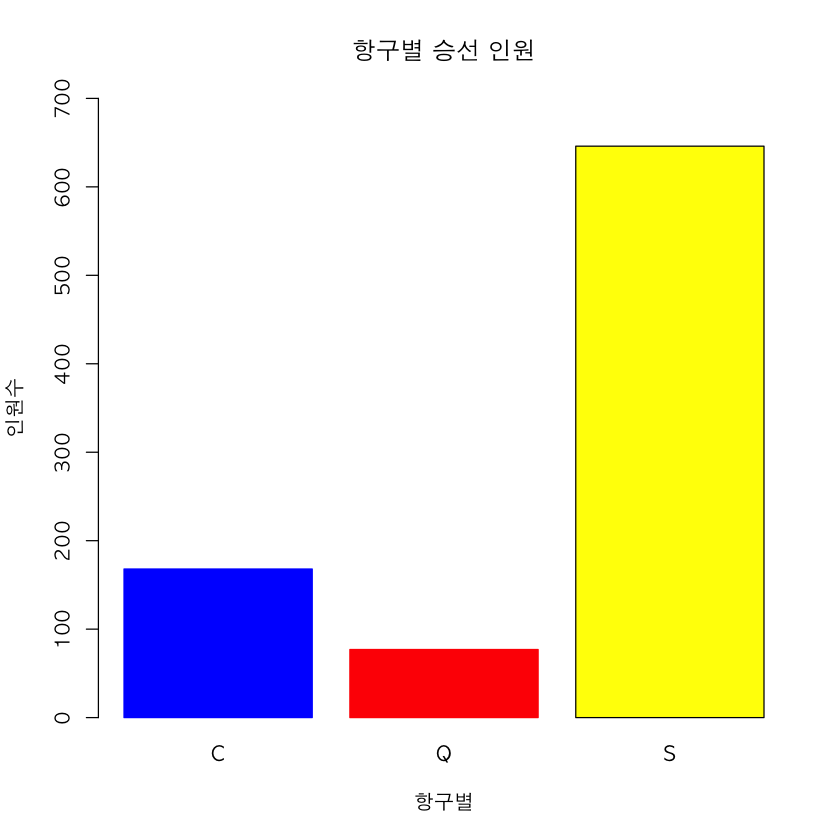

In [40]:
# 데이터 정제 했으니까 다시 항구별이 피처 될 수 있는지 확인 
# - 항구별 승선 인원 막대그래프로 표현하기  
par(family = "AppleGothic")
barplot(table(train_df$Embarked),
        ylim = c(0, 700), 
        main = "항구별 승선 인원", 
        ylab = "인원수", 
        xlab = "항구별",
        col = c("blue",'red','yellow'),
        border = c("blue", "red", 'black')
       )

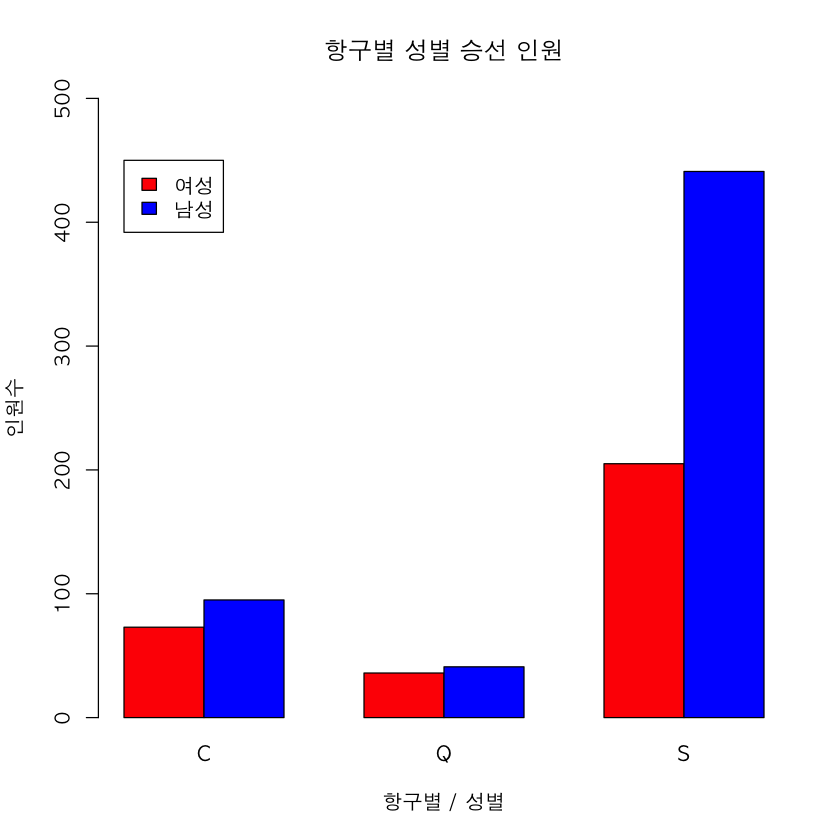

In [41]:
# - 항구별 승선 인원 성별로 막대그래프 표현하기  
par(family = "AppleGothic")
barplot(table(train_df$Sex, train_df$Embarked),
        beside = T,
        ylim = c(0, 500), 
        main = "항구별 성별 승선 인원", 
        ylab = "인원수", 
        xlab = "항구별 / 성별",
        col = c("red","blue"),
       )

legend(1, 450, 
       c("여성", "남성"), 
       fill = c("red","blue")
      )

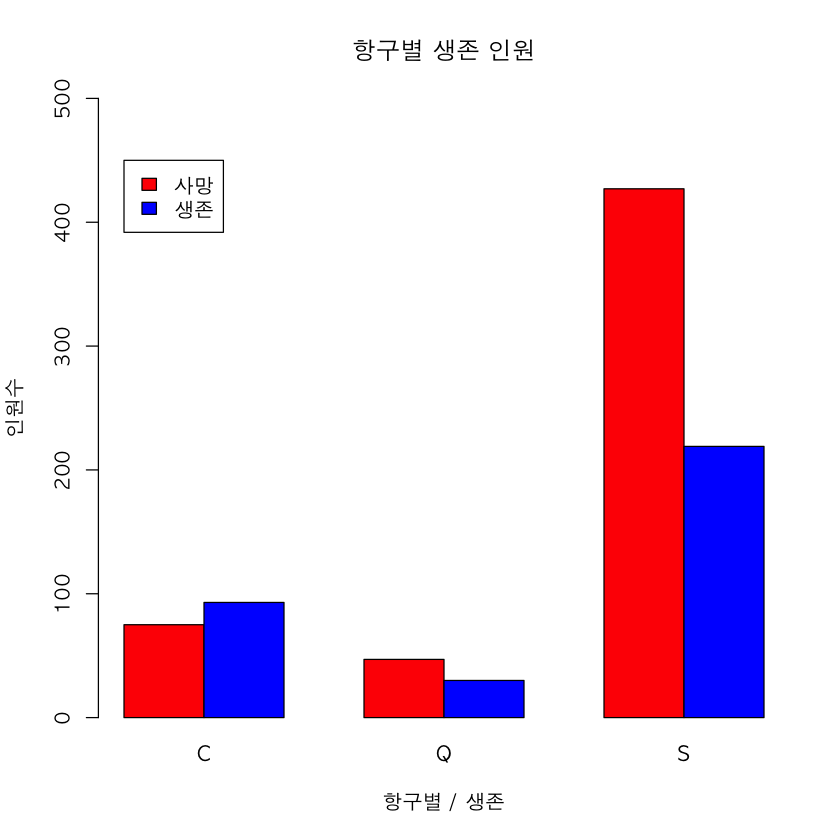

In [42]:
# - 항구별 생존 인원 성별로 막대그래프 표현하기  
par(family = "AppleGothic")
barplot(table(train_df$Survived, train_df$Embarked),
        beside = T,
        ylim = c(0, 500), 
        main = "항구별 생존 인원", 
        ylab = "인원수", 
        xlab = "항구별 / 생존",
        col = c("red","blue"),
       )

legend(1, 450, 
       c("사망", "생존"), 
       fill = c("red","blue")
      )

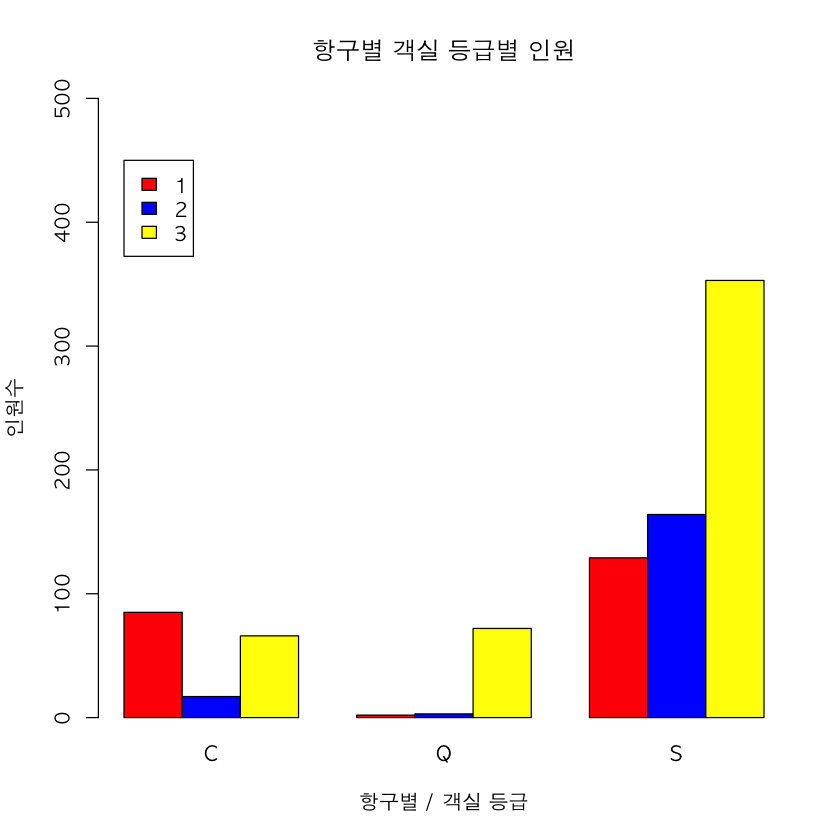

In [43]:
# - 항구별 객실 등급별 인원 막대 그래프로 그리기  
par(family = "AppleGothic")
barplot(table(train_df$Pclass, train_df$Embarked),
        beside = T,
        ylim = c(0, 500), 
        main = "항구별 객실 등급별 인원", 
        ylab = "인원수", 
        xlab = "항구별 / 객실 등급",
        col = c("red","blue", "yellow"),
       )

legend(1, 450, 
       c("1", "2", "3"), 
       fill = c("red","blue", "yellow")
      )

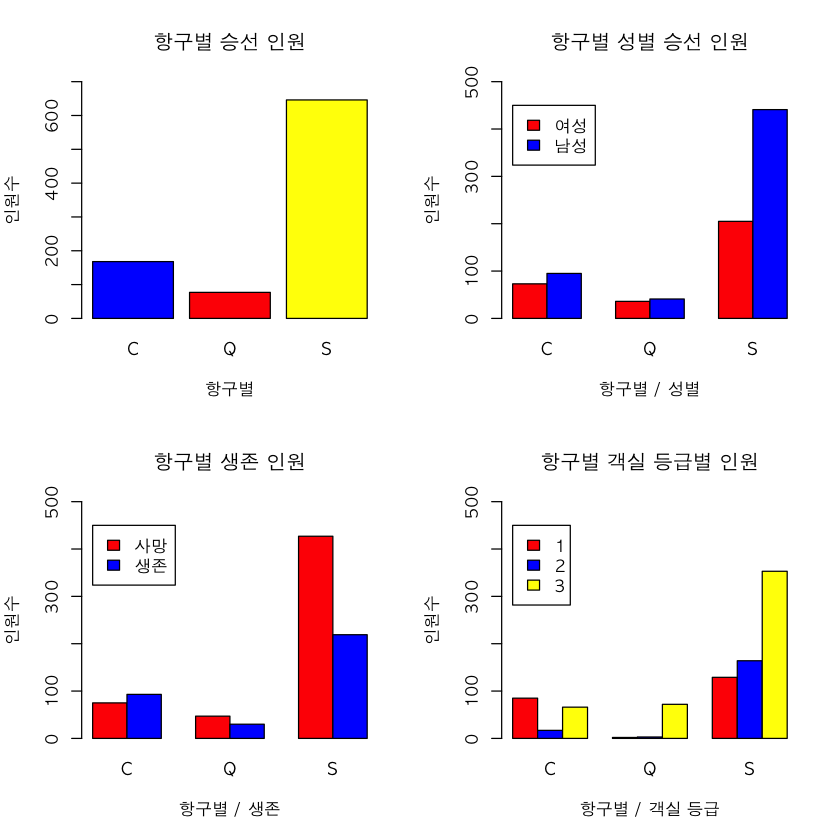

In [44]:
# 그래프 한눈에 보기 

par(mfrow = c(2,2))
par(family = "AppleGothic")

barplot(table(train_df$Embarked),
        ylim = c(0, 700), 
        main = "항구별 승선 인원", 
        ylab = "인원수", 
        xlab = "항구별",
        col = c("blue",'red','yellow')
       )

barplot(table(train_df$Sex, train_df$Embarked),
        beside = T,
        ylim = c(0, 500), 
        main = "항구별 성별 승선 인원", 
        ylab = "인원수", 
        xlab = "항구별 / 성별",
        col = c("red","blue"),
       )

legend(1, 450, 
       c("여성", "남성"), 
       fill = c("red","blue")
      )

barplot(table(train_df$Survived, train_df$Embarked),
        beside = T,
        ylim = c(0, 500), 
        main = "항구별 생존 인원", 
        ylab = "인원수", 
        xlab = "항구별 / 생존",
        col = c("red","blue"),
       )

legend(1, 450, 
       c("사망", "생존"), 
       fill = c("red","blue")
      )

barplot(table(train_df$Pclass, train_df$Embarked),
        beside = T,
        ylim = c(0, 500), 
        main = "항구별 객실 등급별 인원", 
        ylab = "인원수", 
        xlab = "항구별 / 객실 등급",
        col = c("red","blue", "yellow"),
       )

legend(1, 450, 
       c("1", "2", "3"), 
       fill = c("red","blue", "yellow")
      )

--- 
### 머신러닝 실행  

#### RandomForest로 예측모델 생성 

In [45]:
# 복사본 만들어서 하기 

train_df_T <- train_df

In [46]:
# 예측을 위한 컬럼 확인 
target_col <- c('Survived','Sex','Pclass','Embarked')
head(train_df_T[,target_col])

Survived,Sex,Pclass,Embarked
0,male,3,S
0,male,3,S
0,male,3,Q
0,male,1,S
0,male,3,S
0,male,3,S


In [47]:
# Sex 컬럼 숫자로 변환 
train_df_T$SexCode[train_df_T$Sex == "male"] <- 0
train_df_T$SexCode[train_df_T$Sex == "female"] <- 1

In [48]:
head(train_df_T)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S,0
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S,0
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S,0


In [49]:
# Sex 컬럼 삭제 
train_df_T <- subset(train_df_T, select = -Sex)
head(train_df_T)

PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,,S,0
5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,,S,0
6,0,3,"Moran, Mr. James",NA,0,0,330877,8.4583,,Q,0
7,0,1,"McCarthy, Mr. Timothy J",54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",2,3,1,349909,21.0750,,S,0
13,0,3,"Saundercock, Mr. William Henry",20,0,0,A/5. 2151,8.0500,,S,0


In [50]:
target_col <- c('Survived','SexCode','Pclass','Embarked')
head(train_df_T[,target_col])

Survived,SexCode,Pclass,Embarked
0,0,3,S
0,0,3,S
0,0,3,Q
0,0,1,S
0,0,3,S
0,0,3,S


In [51]:
# Embarked 컬럼 문자 -> 숫자 전환 (의미,크기 없는 숫자)
# * Pclass는 크기는 갖지 않지만 의미 있는 숫자니까 그냥 둔다  

# - C = 0, S = 1, Q = 2  : 맞긴 하나 좋은 생각이 아니다. (크기를 갖게 되니까 컴퓨터는 계산 해버림)

# 이럴 때 쓰는 게 : One-Hot-Encoding 

#### One-Hot-Encoding
- C == [1,0,0]
- S == [0,1,0]
- Q == [0,0,1]
--> 행렬로 만들면 덧셈, 뺄셈 계산을 할 때 안전해진다 
--> R은 내부적으로 1 = true, 0 = false 로 인식하니까 그걸 이용해서 만드릭 

In [52]:
# 컬럼 늘려서 행렬식으로 0,1 (false,true) 넣어주기 
train_df_T$Embarked_C = train_df_T$Embarked == "C"
train_df_T$Embarked_S = train_df_T$Embarked == "S"
train_df_T$Embarked_Q = train_df_T$Embarked == "Q"

head(train_df_T[c('Embarked','Embarked_C','Embarked_S','Embarked_Q')])

Embarked,Embarked_C,Embarked_S,Embarked_Q
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
Q,FALSE,FALSE,TRUE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE
S,FALSE,TRUE,FALSE


In [53]:
# 사용할 컬럼 재설정 
target_col <- c('Survived','Pclass','SexCode','Embarked_C','Embarked_S','Embarked_Q')
head(train_df_T[,target_col])

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE


In [54]:
# 데이터셋 만들기 
train_data <- train_df_T[,target_col]
head(train_data)

Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE


In [55]:
str(train_data)

'data.frame':	891 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 1 3 3 3 3 3 3 ...
 $ SexCode   : num  0 0 0 0 0 0 0 1 0 1 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...


In [56]:
# Sampling 
library(caret)
set.seed(1234)
samp <- createDataPartition(train_data$Survived, p=0.7, list=F)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [57]:
str(train_data)

'data.frame':	891 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 1 3 3 3 3 3 3 ...
 $ SexCode   : num  0 0 0 0 0 0 0 1 0 1 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...


In [58]:
# 학습용 데이터 만들기 
data.tr <- train_data[samp,]
# 검증용 데이터 만들기 
data.test <- train_data[-samp,]

In [59]:
str(data.tr)
str(data.test)

'data.frame':	624 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 1 3 2 3 3 1 3 ...
 $ SexCode   : num  0 0 0 0 1 0 1 0 0 0 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Embarked_S: logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ Embarked_Q: logi  FALSE FALSE TRUE FALSE FALSE FALSE ...
'data.frame':	267 obs. of  6 variables:
 $ Survived  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Pclass    : int  3 3 3 3 3 1 1 3 3 3 ...
 $ SexCode   : num  0 0 0 1 0 0 0 0 0 0 ...
 $ Embarked_C: logi  FALSE FALSE FALSE FALSE FALSE TRUE ...
 $ Embarked_S: logi  TRUE TRUE TRUE TRUE FALSE FALSE ...
 $ Embarked_Q: logi  FALSE FALSE FALSE FALSE TRUE FALSE ...


In [60]:
# 학습시키기 
library(randomForest)
model.rf <- randomForest(Survived ~ ., data = data.tr, ntree = 100) 
# -- ntree 기본 100개 / # type 따지지 않음('class' / 'raw' 알아서 해준다)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

The following object is masked from ‘package:dplyr’:

    combine



In [61]:
# 문제와 정답 
x <- subset(data.test, select = -Survived)
y <- data.test$Survived

In [62]:
# 검증하기 
pred <- predict(model.rf, x)

In [63]:
# 주관식으로 계산함 
head(pred)


5         6         7         8         9        16 
0.2142584 0.2142584 0.2142584 0.3813423 0.2311170 0.4489231

In [64]:
# 객관식으로 바꿔서 보면 
pred[pred <= 0.5] <- 0 
pred[pred > 0.5] <- 1
head(pred)

5  6  7  8  9 16 
 0  0  0  0  0  0

In [65]:
library(nnet)
library(e1071)
library(party)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


#### Survived를 factor로 변환 후에 randomForest 실행 

In [66]:
data.tr$Survived <- as.factor(data.tr$Survived)
data.test$Survived <- as.factor(data.test$Survived)


In [67]:
rf <- randomForest(Survived ~ ., data = data.tr, ntree = 100)

In [68]:
x <- subset(data.test, select = -Survived)
y <- data.test$Survived

In [69]:
pred <- predict(rf, x)


In [70]:
mean(pred == y)
table(pred,y)
table(y)
# -- 사망은 10개 틀리고 다 맞췄는데, 생존은 52개만 맞추고 49개 틀림 --> 

[1] 0.7790262

    y
pred   0   1
   0 156  49
   1  10  52

y
  0   1 
166 101 

In [71]:
library(e1071)

In [72]:
# 모델별로 비교해보기 
# 인공신경망 
model.nnet <- nnet(Survived ~ ., data = data.tr, size=2) 
pred <- predict(model.nnet, x,type="class")
mean(pred == y)
table(pred,y)

# ctree
model.ctree <- ctree(Survived ~ ., data = data.tr) 
pred <- predict(model.ctree, x)
mean(pred == y)
table(pred,y)

# svm
model.svm <- svm(Survived ~ ., data = data.tr) 
pred <- predict(model.nnet, x)
mean(pred == y)
table(pred,y)

# 로지스틱 회귀
model.multinom <- multinom(Survived ~ ., data = data.tr) 
pred <- predict(model.multinom, x)
mean(pred == y)
table(pred,y)



# weights:  15
initial  value 425.963931 
iter  10 value 270.931163
iter  20 value 261.950497
iter  30 value 260.497963
iter  40 value 260.446568
iter  50 value 260.424585
iter  60 value 260.398640
iter  70 value 260.225208
iter  80 value 259.340910
iter  90 value 259.164062
iter 100 value 259.151716
final  value 259.151716 
stopped after 100 iterations


[1] 0.7790262

    y
pred   0   1
   0 156  49
   1  10  52

[1] 0.7790262

    y
pred   0   1
   0 156  49
   1  10  52

[1] 0

                   y
pred                 0  1
  0.116380957104575 12  2
  0.116386337998466 77 12
  0.11779275608489  22  6
  0.234132090156662  8  2
  0.28010098534377   1  0
  0.322919466366066 15 14
  0.355679606340091 15  8
  0.378805753548069  6  5
  0.676897324033874  3  6
  0.772499001533447  4  6
  0.930139461449184  2 15
  0.935356136660975  0 15
  0.989543590144031  0  1
  0.994827937704109  1  9

# weights:  7 (6 variable)
initial  value 432.523841 
iter  10 value 280.078664
final  value 280.078633 
converged


[1] 0.7715356

    y
pred   0   1
   0 135  30
   1  31  71

In [73]:
# svm
model.svm <- svm(Survived ~ ., data = data.tr) 
pred <- predict(model.nnet, x)
pred[pred <=0.5] <- 0
pred[pred >0.5] <- 1
mean(pred == y)
table(pred,y)

[1] 0.7790262

    y
pred   0   1
   0 156  49
   1  10  52

In [74]:
# randomforest : 0.779026217228464
# 인공신경망 : 0.779026217228464
# ctree : 0.779026217228464
# svm : 0.779026217228464
# 다중 로지스틱 회귀 : 0.771535580524345

# 일단 틀린것도 감안하였을때 다중 로지스틱 회귀가 그나마 낫다? 


In [75]:
# 컬럼을 추가해볼까,,, 뭘 빼보자,,, 넣어보자,,, 모델 돌려보자,,, 

In [76]:
testing <- train_data
testing$p1_f= testing$Pclass==1 & testing$SexCode==1
testing$p2_f= testing$Pclass==2 & testing$SexCode==1
testing$p3_f= testing$Pclass==3 & testing$SexCode==1
testing$p1_m= testing$Pclass==1 & testing$SexCode==0
testing$p2_m= testing$Pclass==2 & testing$SexCode==0
testing$p3_m= testing$Pclass==3 & testing$SexCode==0


In [77]:
testing <- testing[,-c(2,3)]
head(testing)

Survived,Embarked_C,Embarked_S,Embarked_Q,p1_f,p2_f,p3_f,p1_m,p2_m,p3_m
0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
0,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
0,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE


In [78]:
samp <- createDataPartition(testing$Survived,p=0.7,list=F)
testing.tr <- testing[samp,]
testing.test <- testing[-samp,]
x <- subset(testing.test,select=-Survived)
y <- testing.test$Survived

model.multinom <- multinom(Survived ~ ., data =testing.tr) 
pred <- predict(model.multinom, x)
pred[pred<=0.5] <- 0
pred[pred>0.5] <- 1
mean(pred == y)
table(pred,y)

# weights:  11 (10 variable)
initial  value 432.523841 
iter  10 value 275.299763
final  value 274.289408 
converged


[1] 0.7977528

    y
pred   0   1
   0 155  45
   1   9  58

In [79]:
head(train_df)
head(train_data)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.0500,,S


Survived,Pclass,SexCode,Embarked_C,Embarked_S,Embarked_Q
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,FALSE,TRUE
0,1,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE
0,3,0,FALSE,TRUE,FALSE


# 나이 칼럼 추가

In [80]:
testing2 <- train_df_T
testing2 <- subset(testing2,!is.na(testing2$Age))
table(testing2$Age)
# 나이별 컬럼 추가
testing2$애기 = testing2$Age<20
testing2$어른 = testing2$Age>=20&testing2$Age<40
testing2$노인 = testing2$Age>=40

# 가족 동행 컬럼 추가
testing2$가족 = apply(cbind(testing2$SibSp,testing2$Parch),1,sum)
# 클래스랑 성별 컬럼 추가
testing2$p1_f= testing2$Pclass==1 & testing2$SexCode==1
testing2$p2_f= testing2$Pclass==2 & testing2$SexCode==1
testing2$p3_f= testing2$Pclass==3 & testing2$SexCode==1
testing2$p1_m= testing2$Pclass==1 & testing2$SexCode==0
testing2$p2_m= testing2$Pclass==2 & testing2$SexCode==0
testing2$p3_m= testing2$Pclass==3 & testing2$SexCode==0


#testing2 <- testing2[,c(2,3,12:19)]
testing2 <- testing2[,c(2,13:25)]
head(testing2)


0.42 0.67 0.75 0.83 0.92    1    2    3    4    5    6    7    8    9   10   11 
   1    1    2    2    1    7   10    6   10    4    3    3    4    8    2    4 
  12   13   14 14.5   15   16   17   18   19   20 20.5   21   22   23 23.5   24 
   1    2    6    1    5   17   13   26   25   15    1   24   27   15    1   30 
24.5   25   26   27   28 28.5   29   30 30.5   31   32 32.5   33   34 34.5   35 
   1   23   18   18   25    2   20   25    2   17   18    2   15   15    1   18 
  36 36.5   37   38   39   40 40.5   41   42   43   44   45 45.5   46   47   48 
  22    1    6   11   14   13    2    6   13    5    9   12    2    3    9    9 
  49   50   51   52   53   54   55 55.5   56   57   58   59   60   61   62   63 
   6   10    7    6    1    8    2    1    4    2    5    2    4    3    4    2 
  64   65   66   70 70.5   71   74   80 
   2    3    1    2    1    2    1    1 

,Survived,Embarked_C,Embarked_S,Embarked_Q,애기,어른,노인,가족,p1_f,p2_f,p3_f,p1_m,p2_m,p3_m
1,0,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,1,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
2,0,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,0,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
4,0,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,0,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
5,0,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,4,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
6,0,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,0,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
7,0,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,6,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE


In [81]:
set.seed(1234)
samp <- createDataPartition(testing2$Survived,p=0.7,list=F)
testing2.tr <- testing2[samp,]
testing2.test <- testing2[-samp,]
x <- subset(testing2.test,select=-Survived)
y <- testing2.test$Survived

model.multinom2 <- multinom(Survived ~ ., data =testing2.tr) 
pred <- predict(model.multinom2, x)
pred[pred<=0.5] <- 0
pred[pred>0.5] <- 1
mean(pred == y)
table(pred,y)

# weights:  15 (14 variable)
initial  value 346.573590 
iter  10 value 216.188551
iter  20 value 212.042587
final  value 212.042570 
converged


[1] 0.7850467

    y
pred   0   1
   0 113  25
   1  21  55

In [82]:
testing2 <- train_df_T
testing2 <- subset(testing2,!is.na(testing2$Age))
# 나이별 컬럼 추가
testing2$p1_c = testing2$Age<20&testing2$Pclass==1
testing2$p2_c = testing2$Age<20&testing2$Pclass==2
testing2$p3_c = testing2$Age<20&testing2$Pclass==3
testing2$p1_a = testing2$Age>=20&testing2$Age<60&testing2$Pclass==1
testing2$p2_a = testing2$Age>=20&testing2$Age<60&testing2$Pclass==2
testing2$p3_a = testing2$Age>=20&testing2$Age<60&testing2$Pclass==3
testing2$p1_e = testing2$Age>=60&testing2$Pclass==1
testing2$p2_e = testing2$Age>=60&testing2$Pclass==2
testing2$p3_e = testing2$Age>=60&testing2$Pclass==3

# 가족 동행 컬럼 추가
testing2$가족 = apply(cbind(testing2$SibSp,testing2$Parch),1,sum)
table(testing2$가족)

# 승선지와 클래스 관련 컬럼 추가
# testing2$p1_C = testing2$Pclass==1 & testing2$Embarked_C == T
# testing2$p2_C = testing2$Pclass==2 & testing2$Embarked_C == T
# testing2$p3_C = testing2$Pclass==3 & testing2$Embarked_C == T
# testing2$p1_S = testing2$Pclass==1 & testing2$Embarked_S == T
# testing2$p2_S = testing2$Pclass==2 & testing2$Embarked_S == T
# testing2$p3_S = testing2$Pclass==3 & testing2$Embarked_S == T
# testing2$p1_Q = testing2$Pclass==1 & testing2$Embarked_Q == T
# testing2$p2_Q = testing2$Pclass==2 & testing2$Embarked_Q == T
# testing2$p3_Q = testing2$Pclass==3 & testing2$Embarked_Q == T

# 클래스랑 성별 컬럼 추가
testing2$p1_f= testing2$Pclass==1 & testing2$SexCode==1
testing2$p2_f= testing2$Pclass==2 & testing2$SexCode==1
testing2$p3_f= testing2$Pclass==3 & testing2$SexCode==1
testing2$p1_m= testing2$Pclass==1 & testing2$SexCode==0
testing2$p2_m= testing2$Pclass==2 & testing2$SexCode==0
testing2$p3_m= testing2$Pclass==3 & testing2$SexCode==0

colna <- c('Survived','가족','p1_c',
          'p2_c','p3_c','p1_a','p2_a','p3_a','p1_e','p2_e','p3_e','p1_f','p2_f','p3_f','p1_m','p2_m','p3_m'
#           ,'p1_C','p2_C','p3_C','p1_S','p2_S','p3_S','p1_Q','p2_Q','p3_Q')
           )
#testing2 <- testing2[,c(2,3,12:19)]
testing2 <- testing2[,colna]
head(testing2)


  0   1   2   3   4   5   6   7 
404 139  93  27  11  22  12   6 

,Survived,가족,p1_c,p2_c,p3_c,p1_a,p2_a,p3_a,p1_e,p2_e,p3_e,p1_f,p2_f,p3_f,p1_m,p2_m,p3_m
1,0,1,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
2,0,0,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
4,0,0,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
5,0,4,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
6,0,0,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
7,0,6,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE


In [83]:
samp <- createDataPartition(testing2$Survived,p=0.7,list=F)
testing2.tr <- testing2[samp,]
testing2.test <- testing2[-samp,]
x <- subset(testing2.test,select=-Survived)
y <- testing2.test$Survived

model.multinom2 <- multinom(Survived ~ ., data =testing2.tr) 
pred <- predict(model.multinom2, x)
pred[pred<=0.5] <- 0
pred[pred>0.5] <- 1
mean(pred == y)
table(pred,y)

# weights:  18 (17 variable)
initial  value 346.573590 
iter  10 value 209.023158
final  value 208.657483 
converged


[1] 0.7570093

    y
pred   0   1
   0 112  37
   1  15  50

In [84]:
samp <- createDataPartition(testing2$Survived,p=0.7,list=F)
testing2.tr <- testing2[samp,]
testing2.test <- testing2[-samp,]
x <- subset(testing2.test,select=-Survived)
y <- testing2.test$Survived

model.multinom2 <- multinom(Survived ~ ., data =testing2.tr) 
pred <- predict(model.multinom2, x)
pred[pred<=0.5] <- 0
pred[pred>0.5] <- 1
mean(pred == y)
table(pred,y)

# weights:  18 (17 variable)
initial  value 346.573590 
iter  10 value 205.539040
final  value 203.664423 
converged


[1] 0.7990654

    y
pred   0   1
   0 118  32
   1  11  53

In [85]:
table(train_df$Embarked,train_df$Pclass)
table(train_df$Embarked,train_df$Pclass)

   
      1   2   3
  C  85  17  66
  Q   2   3  72
  S 129 164 353

   
      1   2   3
  C  85  17  66
  Q   2   3  72
  S 129 164 353

In [86]:
# 11시 발표 
# set.seed(1234)
# 5번 돌려서 평균값으로 예측률, 정오표 둘 다 
# pt 자료 준비 

# 머신러닝에서 문자 인식 
# 내일 R 끝 -- 